In [ ]:
%pip install yfinance pandas numpy matplotlib

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stocks = ["HDFCBANK.BO", "TCS.BO", "RELIANCE.BO", "INFY.BO", "ICICIBANK.BO"]
start_date = "2023-01-01"
end_date = "2025-01-01"

data= yf.download(stocks , start=start_date , end=end_date)
## adjust the closing price if a stock has been scaled down eg 1000 scqled to 2:1 ie 500 hogaya  it wont show u 500 rs loss itll show tre picture ki kuch chnge nai hua bas scale down hua he



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2023-01-02 to 2024-12-31
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, HDFCBANK.BO)    472 non-null    float64
 1   (Close, ICICIBANK.BO)   472 non-null    float64
 2   (Close, INFY.BO)        472 non-null    float64
 3   (Close, RELIANCE.BO)    489 non-null    float64
 4   (Close, TCS.BO)         472 non-null    float64
 5   (High, HDFCBANK.BO)     472 non-null    float64
 6   (High, ICICIBANK.BO)    472 non-null    float64
 7   (High, INFY.BO)         472 non-null    float64
 8   (High, RELIANCE.BO)     489 non-null    float64
 9   (High, TCS.BO)          472 non-null    float64
 10  (Low, HDFCBANK.BO)      472 non-null    float64
 11  (Low, ICICIBANK.BO)     472 non-null    float64
 12  (Low, INFY.BO)          472 non-null    float64
 13  (Low, RELIANCE.BO)      489 non-null    float64
 14  (Low, TCS.BO)          

In [7]:
data.columns

MultiIndex([( 'Close',  'HDFCBANK.BO'),
            ( 'Close', 'ICICIBANK.BO'),
            ( 'Close',      'INFY.BO'),
            ( 'Close',  'RELIANCE.BO'),
            ( 'Close',       'TCS.BO'),
            (  'High',  'HDFCBANK.BO'),
            (  'High', 'ICICIBANK.BO'),
            (  'High',      'INFY.BO'),
            (  'High',  'RELIANCE.BO'),
            (  'High',       'TCS.BO'),
            (   'Low',  'HDFCBANK.BO'),
            (   'Low', 'ICICIBANK.BO'),
            (   'Low',      'INFY.BO'),
            (   'Low',  'RELIANCE.BO'),
            (   'Low',       'TCS.BO'),
            (  'Open',  'HDFCBANK.BO'),
            (  'Open', 'ICICIBANK.BO'),
            (  'Open',      'INFY.BO'),
            (  'Open',  'RELIANCE.BO'),
            (  'Open',       'TCS.BO'),
            ('Volume',  'HDFCBANK.BO'),
            ('Volume', 'ICICIBANK.BO'),
            ('Volume',      'INFY.BO'),
            ('Volume',  'RELIANCE.BO'),
            ('Volume',       'TCS.BO')],

### wot all that:
- close is closing price of the stock that day
- high is the highest it went to 
- low is the kiwest it went to
- open is what it opened at that day
- volume is total no of shres traded that day


In [8]:
data["Close"]

Ticker,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,RELIANCE.BO,TCS.BO
Date,,,,,
2023-01-02,1588.997070,887.990112,1439.326294,1269.860229,3054.553467
2023-01-03,1599.286987,886.810059,1437.673828,1260.910034,3101.581055
2023-01-04,1570.855469,884.007446,1411.565186,1241.752319,3104.578369
2023-01-05,1560.272827,864.389038,1392.963257,1239.459351,3101.112305
2023-01-06,1555.054810,855.735291,1368.082275,1251.171021,3008.979004
...,...,...,...,...,...
2024-12-24,1797.650024,1297.650024,1909.300049,1223.500000,4105.145508
2024-12-26,1791.750000,1298.199951,1906.199951,1216.599976,4093.313477
2024-12-27,1797.849976,1307.150024,1916.550049,1220.949951,4092.675293


In [9]:
data["Close"]["HDFCBANK.BO"]

Date
2023-01-02    1588.997070
2023-01-03    1599.286987
2023-01-04    1570.855469
2023-01-05    1560.272827
2023-01-06    1555.054810
                 ...     
2024-12-24    1797.650024
2024-12-26    1791.750000
2024-12-27    1797.849976
2024-12-30    1778.699951
2024-12-31    1772.449951
Name: HDFCBANK.BO, Length: 489, dtype: float64

### returns and volatility

if rapid price fluctutaion in my returns then i can say its "volatile"
measuered using sd
if high sd then more volatile


In [10]:
returns = data.pct_change() #% change each day ie if i bough day before and sold next day kya htoa
returns 
#returns["Close"]["HDFCBANK.BO"]

C:\Users\Mrunmai\AppData\Local\Temp\ipykernel_29384\2342323514.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change() #% change each day ie if i bough day before and sold next day kya htoa


Price            Close                                               \
Ticker     HDFCBANK.BO ICICIBANK.BO   INFY.BO RELIANCE.BO    TCS.BO   
Date                                                                  
2023-01-02         NaN          NaN       NaN         NaN       NaN   
2023-01-03    0.006476    -0.001329 -0.001148   -0.007048  0.015396   
2023-01-04   -0.017778    -0.003160 -0.018160   -0.015194  0.000966   
2023-01-05   -0.006737    -0.022193 -0.013178   -0.001847 -0.001116   
2023-01-06   -0.003344    -0.010011 -0.017862    0.009449 -0.029710   
...                ...          ...       ...         ...       ...   
2024-12-24   -0.001860     0.000964 -0.007563    0.001146  0.005738   
2024-12-26   -0.003282     0.000424 -0.001624   -0.005640 -0.002882   
2024-12-27    0.003404     0.006894  0.005430    0.003576 -0.000156   
2024-12-30   -0.010652    -0.010137 -0.005661   -0.008231 -0.002159   
2024-12-31   -0.003514    -0.009197 -0.013119    0.003757 -0.014847   

Price             High                                               ...  \
Ticker     HDFCBANK.BO ICICIBANK.BO   INFY.BO RELIANCE.BO    TCS.BO  ...   
Date                                                                 ...   
2023-01-02         NaN          NaN       NaN         NaN       NaN  ...   
2023-01-03    0.002807    -0.001048  0.004390   -0.002713  0.016085  ...   
2023-01-04    0.001308     0.002429 -0.006588   -0.005208  0.002199  ...   
2023-01-05   -0.016740    -0.006444 -0.011754   -0.009220  0.002780  ...   
2023-01-06   -0.005747    -0.024612 -0.020199    0.004535 -0.010806  ...   
...                ...          ...       ...         ...       ...  ...   
2024-12-24    0.000138    -0.004551  0.000670    0.005257  0.000462  ...   
2024-12-26    0.002907     0.008529 -0.010738   -0.004418 -0.005928  ...   
2024-12-27   -0.004637     0.002324  0.001614   -0.000326 -0.002815  ...   
2024-12-30    0.006656     0.008628 -0.004158   -0.003462  0.004425  ...   
2024-12-31   -0.018540    -0.026302 -0.010804   -0.003515 -0.015635  ...   

Price             Open                                               \
Ticker     HDFCBANK.BO ICICIBANK.BO   INFY.BO RELIANCE.BO    TCS.BO   
Date                                                                  
2023-01-02         NaN          NaN       NaN         NaN       NaN   
2023-01-03    0.001541     0.006388  0.005287    0.004224 -0.001531   
2023-01-04    0.006432     0.001169  0.001249   -0.003388  0.013497   
2023-01-05   -0.012660     0.003281 -0.014381   -0.013286  0.007869   
2023-01-06   -0.009013    -0.024612 -0.020653    0.001584 -0.009009   
...                ...          ...       ...         ...       ...   
2024-12-24    0.013455     0.003012 -0.001557    0.012035 -0.009300   
2024-12-26   -0.003575     0.000885 -0.009433   -0.005885  0.003858   
2024-12-27   -0.004033    -0.001577  0.005220   -0.006532 -0.003352   
2024-12-30    0.002625     0.001579  0.000026    0.002466  0.003099   
2024-12-31   -0.013872    -0.009307 -0.010960   -0.007584 -0.012300   

Price           Volume                                               
Ticker     HDFCBANK.BO ICICIBANK.BO   INFY.BO RELIANCE.BO    TCS.BO  
Date                                                                 
2023-01-02         NaN          NaN       NaN         NaN       NaN  
2023-01-03    0.400081    -0.375969  0.676748   -0.220420 -0.362106  
2023-01-04   -0.114532     0.808085  0.467979    0.270356 -0.080790  
2023-01-05   -0.018884    -0.256688  0.257002   -0.167812  0.278950  
2023-01-06    0.148446    -0.267462 -0.303501   -0.210643  0.699652  
...                ...          ...       ...         ...       ...  
2024-12-24    0.370603    -0.509181  2.442137   -0.919567 -0.343891  
2024-12-26   -0.467345     0.325890  0.302329    1.077620 -0.260434  
2024-12-27    1.089787    -0.039284  0.016107    0.172643  0.610639  
2024-12-30    0.337525    -0.197671 -0.223111   -0.518514 -0.254323  
2024-12-31   -0.633666    -0.787860

In [11]:
volatility = returns.std()*np.sqrt(489) #annual volatility as 252 days if biannual then 489
print("Annualized volatility",volatility)

Annualized volatility Price   Ticker      
Close   HDFCBANK.BO       0.275671
        ICICIBANK.BO      0.259019
        INFY.BO           0.327121
        RELIANCE.BO       0.293845
        TCS.BO            0.276885
High    HDFCBANK.BO       0.237504
        ICICIBANK.BO      0.240981
        INFY.BO           0.293297
        RELIANCE.BO       0.255372
        TCS.BO            0.248269
Low     HDFCBANK.BO       0.258773
        ICICIBANK.BO      0.240433
        INFY.BO           0.313487
        RELIANCE.BO       0.264778
        TCS.BO            0.251880
Open    HDFCBANK.BO       0.286537
        ICICIBANK.BO      0.278770
        INFY.BO           0.331443
        RELIANCE.BO       0.296113
        TCS.BO            0.278359
Volume  HDFCBANK.BO      61.628995
        ICICIBANK.BO     58.331840
        INFY.BO          60.729108
        RELIANCE.BO      62.647836
        TCS.BO          648.650766
dtype: float64


### CAGR
### Compound Annual Growth Rate
 annual rate at which the stock grows (assumed steady grwoth)
 so if ut went from 100 to 120 over 500 din per year kitna %increase? growth rate per year

 (final/intial) ** (252/lentgh of data) - 1
  note double asterix is to the power of

In [12]:
cagr = (data.iloc[-1] / data.iloc[0]) ** (252/len(data)) - 1
print("\nCAGR:\n", cagr["Close"]["HDFCBANK.BO"])


CAGR:
 0.057920947365753594


In [39]:
#above implies it grew at a rate of 0.057% per year from stat value to final 

## Correlation matrix

In [13]:
correlation_data_vCL = returns[["Volume","Close"]]



In [ ]:
%pip install seaborn

In [14]:
import seaborn as sns

In [15]:
def corr_create(correlation_matrix):
    correlation_matrix = correlation_data_vCL.corr()
    plt.figure(figsize=(8,6))
    plt.title("Stock correlation heatmap")
    sns.heatmap(correlation_matrix,annot = True , cmap = "coolwarm")
    plt.show()
    

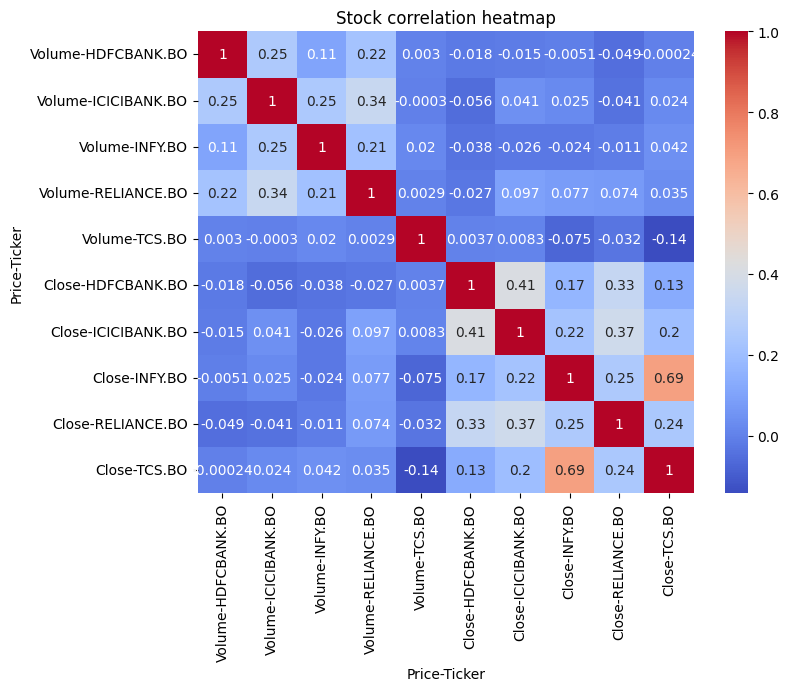

In [53]:
corr_create(correlation_data_vCL)

looking at say hdfc bank first corr is -0.018 means that the closing price doesnt seem to affect the volume traded that day

- if it was -1 it would mean proper inverse relation
- one would mean proper linear relation
- 0 near 0 implies no relaton 

majority of above are close to 0 hence volume doesnt seem to be affceted by closing price


In [16]:
correlation_data_vOL = correlation_data_vCL = returns[["Volume","Open"]]

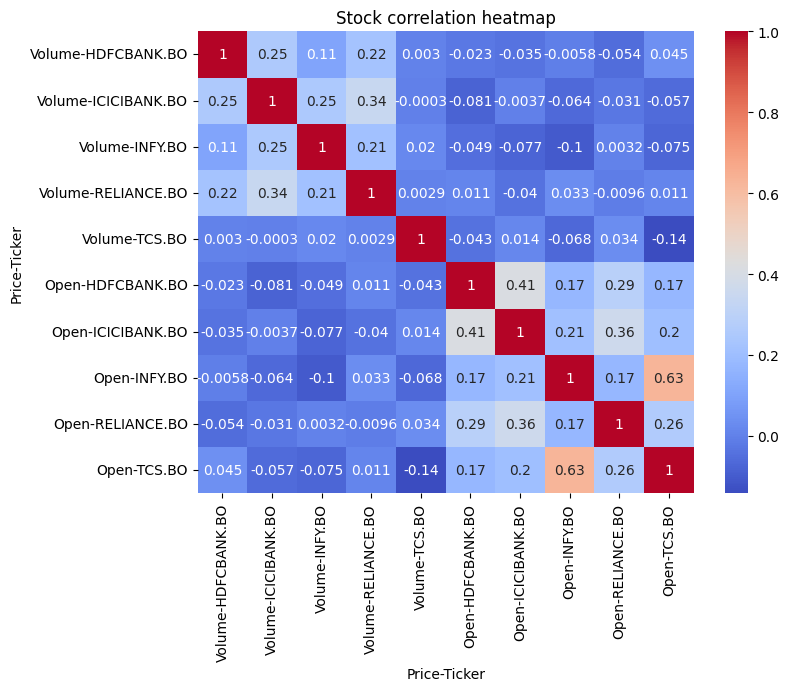

In [17]:
corr_create(correlation_data_vOL)

- even opening price dont seem to be affec ting the volume traded much
how much vairance may affect the colume traded hence well try volatility vs voluem

In [18]:

nan_returns = returns.dropna()
nan_returns["Close"]["HDFCBANK.BO"]


Date
2023-01-03    0.006476
2023-01-04   -0.017778
2023-01-05   -0.006737
2023-01-06   -0.003344
2023-01-09    0.001913
                ...   
2024-12-24   -0.001860
2024-12-26   -0.003282
2024-12-27    0.003404
2024-12-30   -0.010652
2024-12-31   -0.003514
Name: HDFCBANK.BO, Length: 488, dtype: float64

In [19]:
nan_volume=data[1:]
nan_volume["Volume"]["HDFCBANK.BO"]

Date
2023-01-03    175881.0
2023-01-04    155737.0
2023-01-05    152796.0
2023-01-06    175478.0
2023-01-09    196695.0
                ...   
2024-12-24    196465.0
2024-12-26    104648.0
2024-12-27    218692.0
2024-12-30    292506.0
2024-12-31    107155.0
Name: HDFCBANK.BO, Length: 488, dtype: float64

In [20]:
nan_returns_aligned, nan_volume_aligned = nan_returns.align(nan_volume, join='inner')


new_data = pd.DataFrame({
    "Returns":nan_returns["Close"]["HDFCBANK.BO"],
    "Volume": nan_volume["Volume"]["HDFCBANK.BO"]
})

new_data.head()

,Returns,Volume
Date,,
2023-01-03,0.006476,175881.0
2023-01-04,-0.017778,155737.0
2023-01-05,-0.006737,152796.0
2023-01-06,-0.003344,175478.0
2023-01-09,0.001913,196695.0


In [21]:
correlations_rv = {}

for stock in stocks:
    new_data = pd.DataFrame({
        "Returns": nan_returns["Close"][stock],
        "Volume": nan_volume["Volume"][stock]
    })
    
    correlation = new_data["Returns"].corr(new_data["Volume"])
    correlations_rv[stock] = correlation

print(correlations_rv)

{'HDFCBANK.BO': -0.08420367698773717, 'TCS.BO': -0.1314794032074343, 'RELIANCE.BO': 0.02962813944269572, 'INFY.BO': 0.026317846501447802, 'ICICIBANK.BO': 0.13009353897110065}


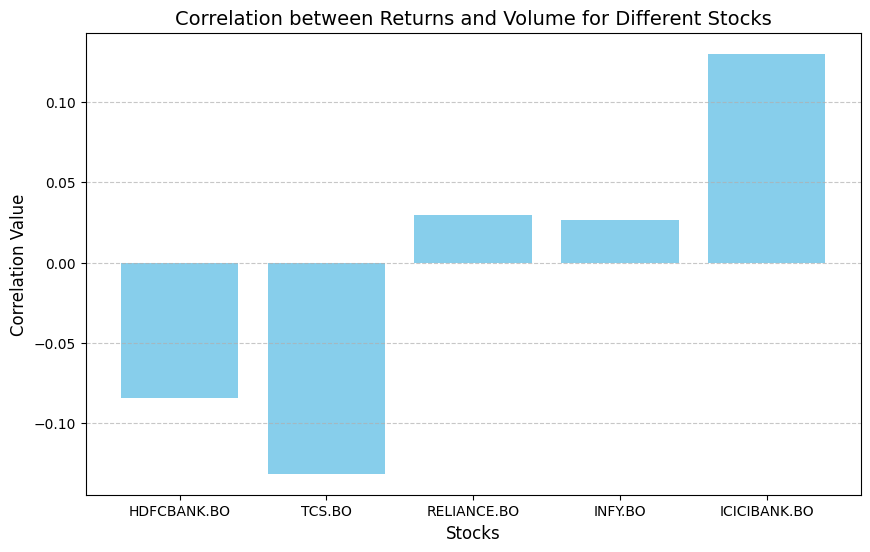

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(correlations_rv.keys(), correlations_rv.values(), color='skyblue')
plt.title('Correlation between Returns and Volume for Different Stocks', fontsize=14)
plt.xlabel('Stocks', fontsize=12)
plt.ylabel('Correlation Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### udnerstanding
- for icic one ther is weak +ve relation hence acc to evidence higher volume may give me higher returns at the end of the day hence its relatvely fine to get the stock
- for the tcs one there is a weak -ve relation hecne if vol seems to be high ik historicallt that the return will be less than usual 

### For my portfolio you need stocks such that they are least correlated ie ek gira toh dusre shouldnt fall 

- hence well create a correlation between returns of my stocks


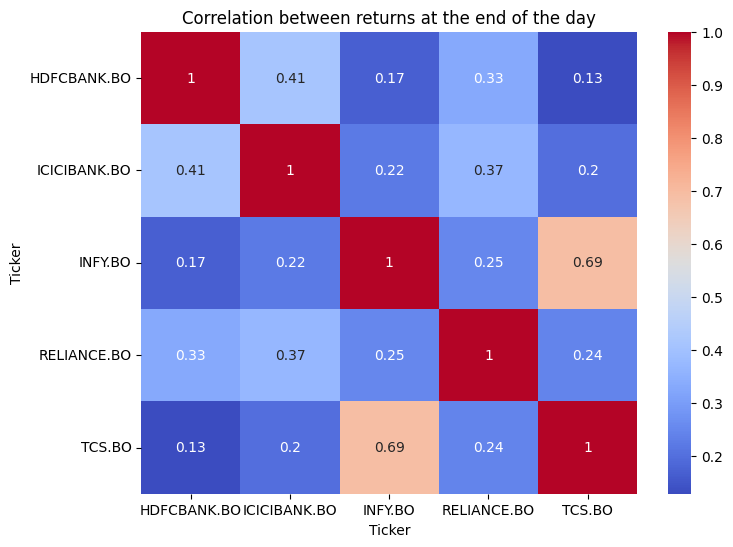

In [23]:
corr_port = returns["Close"].corr()
corr_port
plt.figure(figsize=(8,6))
plt.title("Correlation between returns at the end of the day")
sns.heatmap(corr_port,annot = True , cmap = "coolwarm")
plt.show()


### so as i can see from this all are +ve correlated hence my goto would be to take ones least +vely related 

- icici and hdfc are wayy too correlated
- while tcs and hdfc are leasr

lowest correlated ones are tcs hdfc and reliance from the subset


In [24]:
weights = np.array([1/3, 1/3, 1/3]) # i assign cutsom wiegts
selected_stocks = ["HDFCBANK.BO", "TCS.BO", "RELIANCE.BO"]
selected_ret = returns["Close"][selected_stocks]
selected_ret


Ticker,HDFCBANK.BO,TCS.BO,RELIANCE.BO
Date,,,
2023-01-02,NaN,NaN,NaN
2023-01-03,0.006476,0.015396,-0.007048
2023-01-04,-0.017778,0.000966,-0.015194
2023-01-05,-0.006737,-0.001116,-0.001847
2023-01-06,-0.003344,-0.029710,0.009449
...,...,...,...
2024-12-24,-0.001860,0.005738,0.001146
2024-12-26,-0.003282,-0.002882,-0.005640
2024-12-27,0.003404,-0.000156,0.003576


In [25]:
portfolio_ret = selected_ret.dot(weights)
portfolio_ret.head(20)

#this is now my daily return if i made them my portfolio

Date
2023-01-02         NaN
2023-01-03    0.004941
2023-01-04   -0.010668
2023-01-05   -0.003233
2023-01-06   -0.007868
2023-01-09    0.019605
2023-01-10   -0.014183
2023-01-11    0.004664
2023-01-12   -0.004607
2023-01-13    0.003558
2023-01-16   -0.002752
2023-01-17    0.013969
2023-01-18    0.006498
2023-01-19   -0.000800
2023-01-20   -0.001508
2023-01-23    0.005782
2023-01-24    0.004665
2023-01-25   -0.014122
2023-01-27   -0.014920
2023-01-30    0.004056
dtype: float64

# work on automating weights and choosing best portfolio return 


## time series analysis

In [118]:
# new concepts

## Simple moving average:
- avg over a time period usually 10,20,50 

### sd from sma is then used to create bollinger bands which are an envelope 
- give us range of volatility
- low volatility = bands tighten hence value can go either directoin
- when bands seperate a trendd may be endeing 
- prices touch ine band then move onto another
- Price near upper band: Overbought (might drop)
- Price near lower band: Oversold (might rise)

In [29]:
#lets create bollinger bands for our closing data over 2 years for hDFCbank
#1 plot our closing data over 2 years

hdfc_closing = data["Close"]["HDFCBANK.BO"]


In [30]:
hdfc_closing.isnull().sum()
#closed day values

17

## V imp covering non business days

In [31]:
hdfc_closing.index = pd.to_datetime(hdfc_closing.index)
full_range = pd.date_range(start=hdfc_closing.index.min(),
                           end=hdfc_closing.index.max(),
                           freq='B')  # 'B' = business days (weekdays excluding weekends)
hdfc_filled = hdfc_closing.reindex(full_range).ffill()
hdfc_filled.index.name = 'Date'
hdfc_filled.name = 'Close'

In [32]:
hdfc_filled.isnull().sum()

0

In [33]:
hdfc_filled.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 522 entries, 2023-01-02 to 2024-12-31
Freq: B
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
522 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


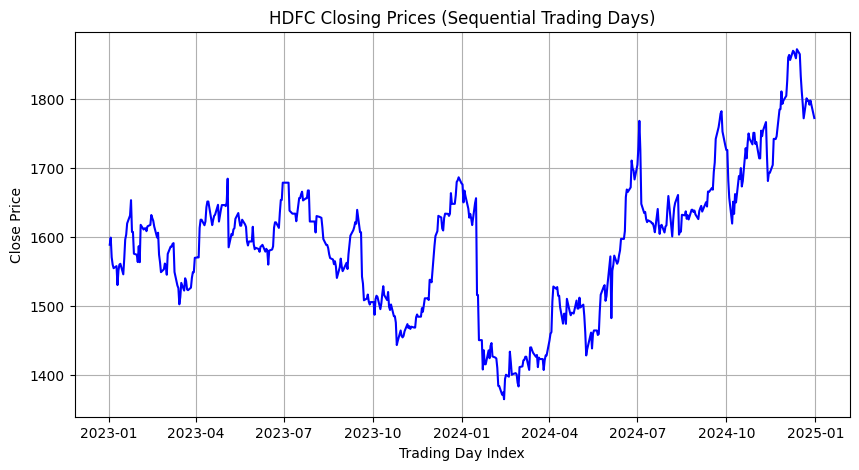

In [34]:
plt.figure(figsize=(10,5))
plt.plot(hdfc_filled.index,hdfc_filled.values, color='blue')
plt.title("HDFC Closing Prices (Sequential Trading Days)")
plt.xlabel("Trading Day Index")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


In [35]:
df = hdfc_filled.to_frame()

df["Close"].values

array([1588.99707031, 1599.2869873 , 1570.85546875, 1560.27282715,
       1555.05480957, 1558.02966309, 1530.62219238, 1551.59228516,
       1560.27282715, 1561.39453125, 1546.17907715, 1568.95361328,
       1596.60473633, 1603.57861328, 1619.86706543, 1631.42492676,
       1653.51672363, 1607.57751465, 1607.57751465, 1576.02478027,
       1574.51306152, 1563.93041992, 1586.94885254, 1563.73535156,
       1617.81872559, 1611.04003906, 1612.64941406, 1612.84448242,
       1608.6505127 , 1615.62414551, 1617.72119141, 1632.05895996,
       1627.57226562, 1623.71972656, 1615.47790527, 1599.38464355,
       1606.35827637, 1574.75695801, 1563.83288574, 1549.3001709 ,
       1553.39672852, 1561.78466797, 1558.37097168, 1545.59375   ,
       1575.7322998 , 1586.26599121, 1586.26599121, 1590.21630859,
       1591.33789062, 1549.49523926, 1529.98815918, 1526.28186035,
       1502.77587891, 1513.21203613, 1533.79211426, 1522.62426758,
       1540.4732666 , 1536.47436523, 1524.1361084 , 1523.25830

In [36]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()


In [37]:
df['SMA_50']


Date
2023-01-02            NaN
2023-01-03            NaN
2023-01-04            NaN
2023-01-05            NaN
2023-01-06            NaN
                 ...     
2024-12-25    1772.672004
2024-12-26    1775.040005
2024-12-27    1777.374004
2024-12-30    1778.372002
2024-12-31    1779.539001
Freq: B, Name: SMA_50, Length: 522, dtype: float64

In [38]:
df.isnull().sum() #start 50 days obv nothing

Close      0
SMA_50    49
dtype: int64

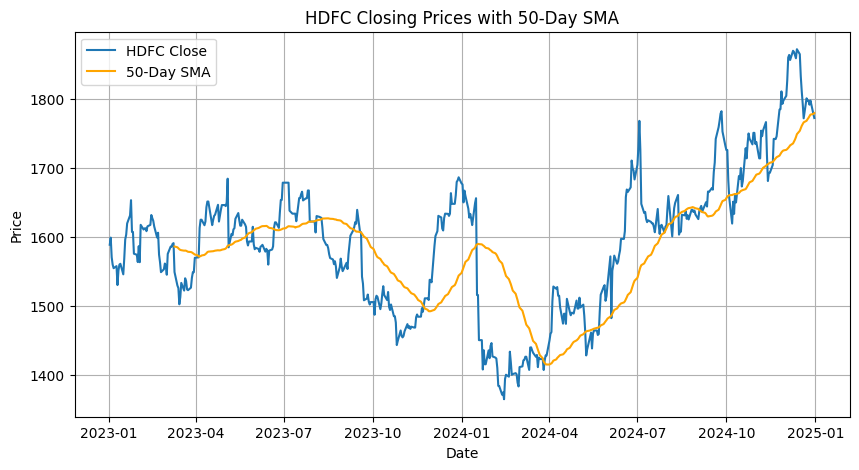

In [39]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='HDFC Close')
plt.plot(df['SMA_50'], label='50-Day SMA', color='orange')
plt.title("HDFC Closing Prices with 50-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [40]:
#now to calculate sd from our sma 

In [41]:
#for std
k = 2

df["STD_50"] = df['Close'].rolling(window =50).std()
df['Upper_Band'] = df['SMA_50'] + (k * df['STD_50'])
df['Lower_Band'] = df['SMA_50'] - (k * df['STD_50'])

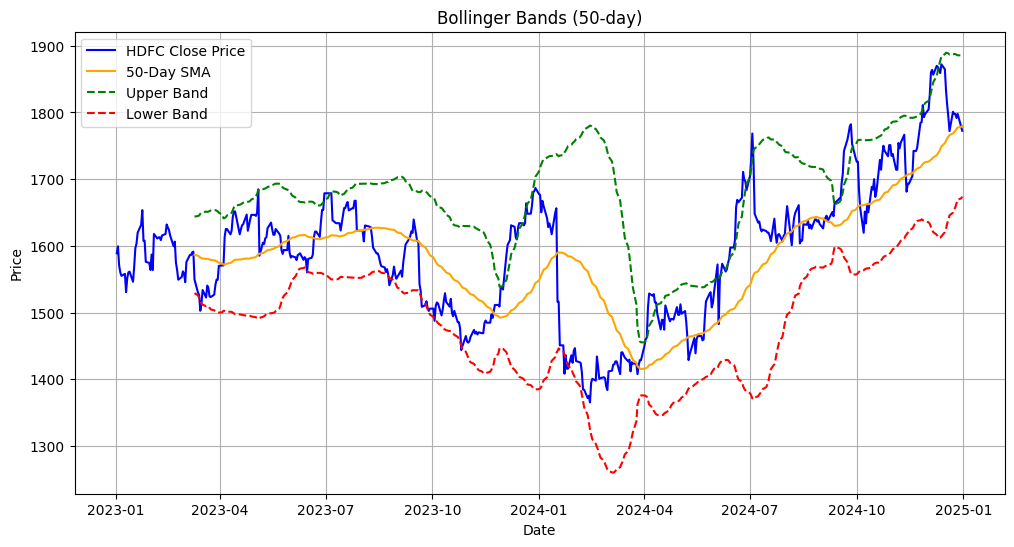

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='HDFC Close Price', color='blue')
plt.plot(df['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(df['Upper_Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(df['Lower_Band'], label='Lower Band', color='red', linestyle='--')

plt.title('Bollinger Bands (50-day)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
#forecast tom
#port tom
#backtesting?

## Time series using ARIMA and LTSM

### ARIMA (Linear model)
- AR is autoregressive ie uses **past values** to predict futures ones (yt = ay(t-1) + by(t-2) .....)
- I differencing to remove trends (delta) - give stationariyt
- MA is moving average ie **using past errors**
- parameters are p d q ( p is the lag you want to go up to  , d is order of your delta , q is lag you want in errors   )
- as autocorrelation plots help us notice trends in corelation we can decide our lags from there
- stationarity reqired
- short term forecasting with stable trend

### LTSM (Long term short memory)

- RNN as sequential data( non linear deep learning)
- best for long term , volatile stocks




In [44]:
#ARIMA Model

In [46]:
df.head() #df is my model with filled in values for closing days

,Close,SMA_50,STD_50,Upper_Band,Lower_Band
Date,,,,,
2023-01-02,1588.997070,NaN,NaN,NaN,NaN
2023-01-03,1599.286987,NaN,NaN,NaN,NaN
2023-01-04,1570.855469,NaN,NaN,NaN,NaN
2023-01-05,1560.272827,NaN,NaN,NaN,NaN
2023-01-06,1555.054810,NaN,NaN,NaN,NaN


In [47]:
#splitting the data

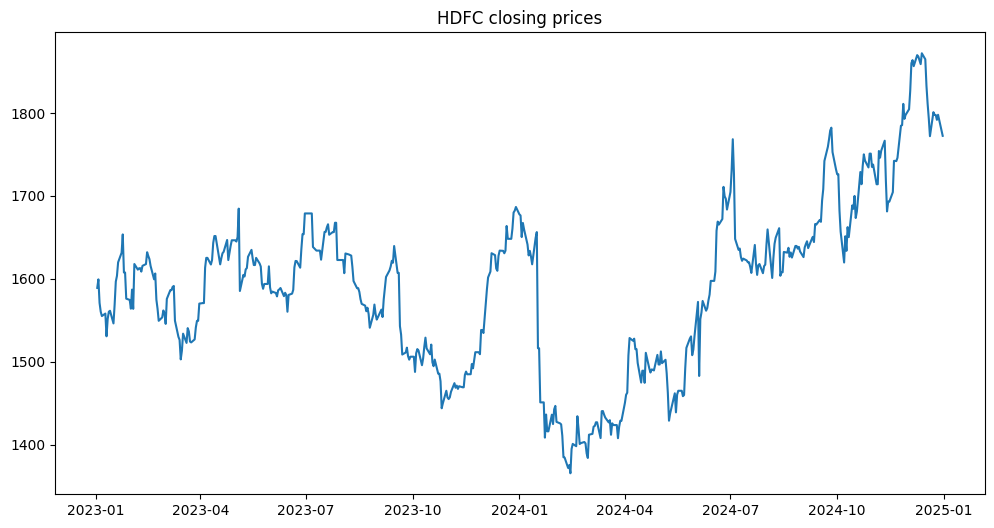

In [112]:
data["Close"] = df["Close"]
plt.figure(figsize=(12,6))

plt.plot(data["Close"],label = "")
plt.title("HDFC closing prices")
plt.show()

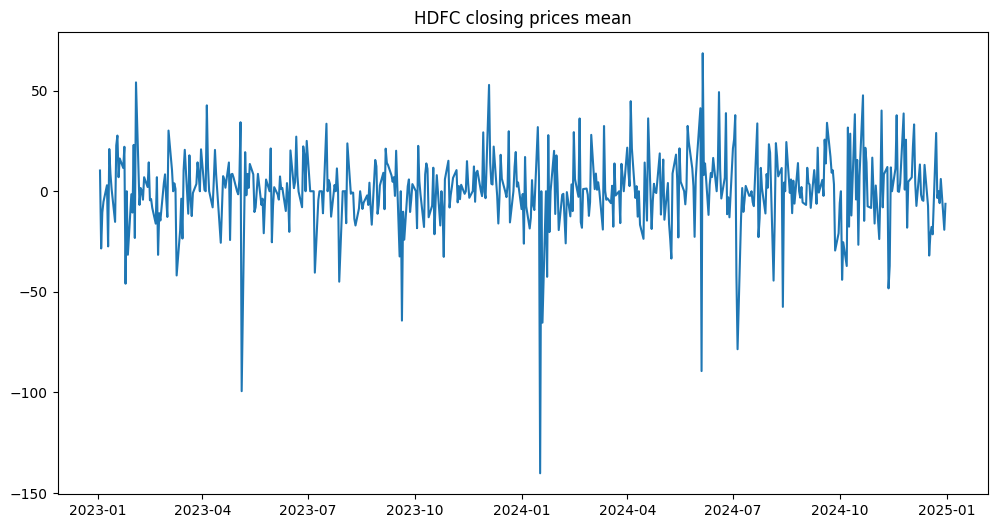

In [113]:
plt.figure(figsize=(12,6))

plt.plot(data["Close"].diff(),label = "")
plt.title("HDFC closing prices mean")
plt.show()

In [ ]:
%pip install statsmodels


In [ ]:
%pip install scikit-learn

In [106]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [107]:
from statsmodels.tsa.stattools import adfuller


In [114]:
### here after rmse came 20k
# lets check if model is stationary
# data.isnull().sum()

# verify stationary

result = adfuller(data["Close"])
print("ADF p-value: " , result[1])  #result[1] is my  p value p< 0.05 reject h0 and hecne stationary ie i can keep my d = 0



ADF p-value:  0.3897519121723135


here as p = 0.39 > 0.05 i need to keep d =1 or higher

In [137]:
data["Close_diff"] = data["Close"].diff().dropna()
result_diff = adfuller(data["Close_diff"])
print(f"ADF p-value after differencing: {result_diff[1]:.4f}") 

ADF p-value after differencing: 0.0000


In [138]:
data["Close_diff"]

Date
2023-01-03    10.289917
2023-01-04   -28.431519
2023-01-05   -10.582642
2023-01-06    -5.218018
2023-01-09     2.974854
                ...    
2024-12-25     0.000000
2024-12-26    -5.900024
2024-12-27     6.099976
2024-12-30   -19.150024
2024-12-31    -6.250000
Freq: B, Name: Close, Length: 521, dtype: float64

In [119]:
data["Close"]

Date
2023-01-02    1588.997070
2023-01-03    1599.286987
2023-01-04    1570.855469
2023-01-05    1560.272827
2023-01-06    1555.054810
                 ...     
2024-12-25    1797.650024
2024-12-26    1791.750000
2024-12-27    1797.849976
2024-12-30    1778.699951
2024-12-31    1772.449951
Freq: B, Name: Close, Length: 522, dtype: float64

In [140]:
# we will now plot pcf and acf to get my p and q values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [147]:
print(data["Close"].diff().dropna())

Date
2023-01-03    10.289917
2023-01-04   -28.431519
2023-01-05   -10.582642
2023-01-06    -5.218018
2023-01-09     2.974854
                ...    
2024-12-25     0.000000
2024-12-26    -5.900024
2024-12-27     6.099976
2024-12-30   -19.150024
2024-12-31    -6.250000
Freq: B, Name: Close, Length: 521, dtype: float64


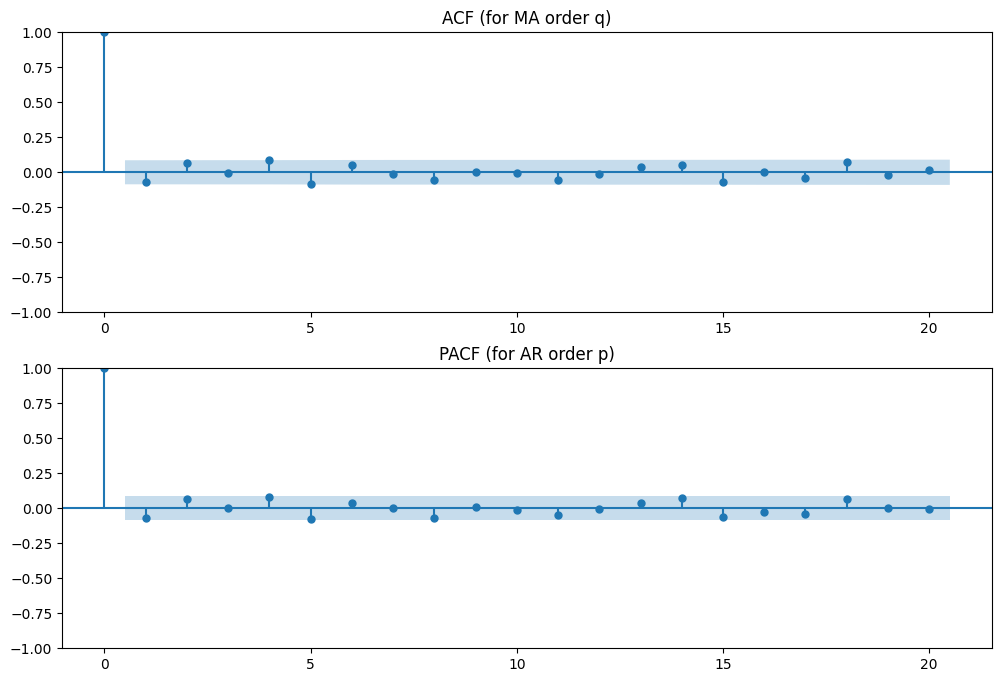

In [151]:
#p and q come from stationary data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data["Close"].diff().dropna(), lags=20, ax=ax1, title="ACF (for MA order q)")
plot_pacf(data["Close"].diff().dropna(), lags=20, ax=ax2, title="PACF (for AR order p)")
plt.show()

depending at hwat postion at spikes are i can predict , here they are at  0 so worth trying a 0

In [ ]:
#so now we wil try 0 1 0 

In [ ]:
#split data 80 -20
# train = data[:int(0.8*len(data))]
# test = data[int(0.8*len(data)):]  we had used this ranomly before

model = ARIMA(data["Close"] , order = (0,1,0))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  522
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2282.456
Date:                Sat, 10 May 2025   AIC                           4566.913
Time:                        10:44:21   BIC                           4571.169
Sample:                    01-02-2023   HQIC                          4568.580
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       373.8897     10.423     35.872      0.000     353.461     394.318
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):              1527.00
Prob(Q):                              0.13   Pr

In [155]:
# train with manual predictino
train = data["Close"][:-30]
test = data["Close"][-30:]
model = ARIMA(train, order=(0, 1, 0))
results = model.fit()
forecast = results.forecast(steps=len(test))

In [157]:
rmse_rw = np.sqrt(mean_squared_error(test, forecast))
print(f"ARIMA(0,1,0) RMSE: {rmse_rw:.2f}")

ARIMA(0,1,0) RMSE: 80.20


### will get p and q values from acf

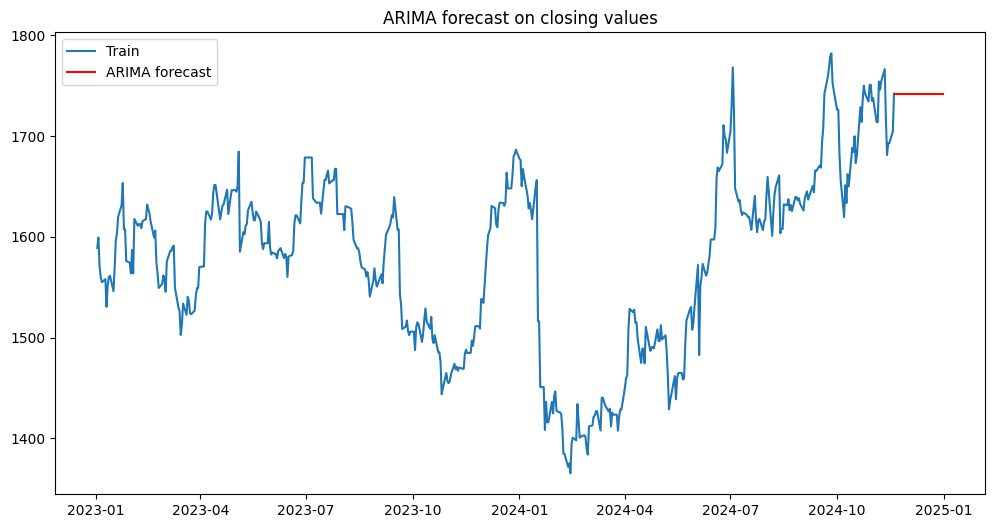

In [158]:
plt.figure(figsize = (12,6))
plt.plot(train.index,train , label = "Train")
# plt.plot(test.index,test, label = "Actual", color = "green")
plt.plot(forecast.index,forecast, label = "ARIMA forecast" , color = "red")
plt.title("ARIMA forecast on closing values")
plt.legend()
plt.show()

from our own manual preediction we get barely any good forecast
we will try autoarima to see how much my 0 1 0 model doffered

In [ ]:
%pip install pmdarima


In [162]:
from pmdarima import auto_arima

auto_model = auto_arima(
    train,
    seasonal = False,
    stepwise = True,
    trace = True,
    suppress_warnings = True
)

C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4315.070, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4313.761, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4312.879, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4313.188, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4311.887, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4311.070, Time=0.14 sec


C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4315.073, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4313.051, Time=0.20 sec


C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4313.445, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4313.292, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4309.203, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4311.328, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4311.020, Time=0.02 sec


C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4313.193, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4311.185, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4311.573, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=4311.420, Time=0.03 sec


C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4313.203, Time=0.09 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.503 seconds


In [163]:
print(auto_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  492
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2151.601
Date:                Sat, 10 May 2025   AIC                           4309.203
Time:                        10:53:41   BIC                           4321.792
Sample:                    01-02-2023   HQIC                          4314.147
                         - 11-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8484      0.140     -6.066      0.000      -1.122      -0.574
ma.L1          0.7863      0.159      4.960      0.000       0.476       1.097
sigma2       374.7279     10.822     34.628      0.0

so the model gives me best set as 1 1 1

In [165]:
auto_forecast = auto_model.predict(n_periods=len(test))
rmse_auto = np.sqrt(mean_squared_error(test, auto_forecast))
print(f"Auto-ARIMA RMSE: {rmse_auto:.2f}")


Auto-ARIMA RMSE: 80.80


C:\Users\Mrunmai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


as my p and q became 0 it means its not able to linearixe my previous erros and values hence its moving ranodmly

hence data is "random walk" ie i cant use a linear method atleast

## lets try ltsm

In [172]:
#needs normalied data demn
data["Close"]
prices = data['Close'].values.reshape(-1, 1) ## converted to nummpy array


In [182]:
len(prices)
#normalize

522

In [176]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices) #scale bw 0 1

In [177]:
scaled_prices

array([[0.44136228],
       [0.46167062],
       [0.40555773],
       [0.38467167],
       [0.37437331],
       [0.38024452],
       [0.32615272],
       [0.36753962],
       [0.38467167],
       [0.38688548],
       [0.35685602],
       [0.4018042 ],
       [0.45637688],
       [0.47014063],
       [0.50228777],
       [0.52509855],
       [0.56869926],
       [0.47803293],
       [0.47803293],
       [0.41575996],
       [0.41277641],
       [0.39189035],
       [0.43731988],
       [0.39150536],
       [0.49824514],
       [0.48486662],
       [0.48804291],
       [0.4884279 ],
       [0.48015061],
       [0.49391388],
       [0.49805264],
       [0.52634989],
       [0.51749488],
       [0.50989145],
       [0.49362526],
       [0.46186335],
       [0.47562662],
       [0.41325777],
       [0.39169785],
       [0.36301586],
       [0.37110089],
       [0.38765546],
       [0.38091814],
       [0.35570081],
       [0.41518272],
       [0.43597218],
       [0.43597218],
       [0.443

In [183]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

were now creating training data
so at a seq length ie lag were creating a set of inputs of length seq_lenght then were assigning it the oupput of seq_length  + 1


In [184]:
SEQ_length = 60
X, y =create_sequences(scaled_prices,SEQ_length)

In [188]:
X

array([[[0.44136228],
        [0.46167062],
        [0.40555773],
        ...,
        [0.33770266],
        [0.31335168],
        [0.31161923]],

       [[0.46167062],
        [0.40555773],
        [0.38467167],
        ...,
        [0.31335168],
        [0.31161923],
        [0.3187413 ]],

       [[0.40555773],
        [0.38467167],
        [0.37437331],
        ...,
        [0.31161923],
        [0.3187413 ],
        [0.34703854]],

       ...,

       [[0.57517928],
        [0.50185942],
        [0.5643244 ],
        ...,
        [0.85316296],
        [0.85316296],
        [0.84151859]],

       [[0.50185942],
        [0.5643244 ],
        [0.52958857],
        ...,
        [0.85316296],
        [0.84151859],
        [0.85355759]],

       [[0.5643244 ],
        [0.52958857],
        [0.58603417],
        ...,
        [0.84151859],
        [0.85355759],
        [0.81576281]]])

In [189]:
#creating a 80-20 split

split = int(0.8*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [190]:
%pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
     ---------------------------------------- 0.0/49.8 kB ? eta -:--:--
     ---------------------------------------- 49.8/49.8 kB ? eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/375.9 MB 14.9 MB/s eta 0:00:26
   ---------------------------------------- 1.0/375.9 M

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Mrunmai\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Mrunmai\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [191]:
#now that weve created a training set we train model :o

## Tensor flow issues hence were running it on colab for now

In [192]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow.python'

In [193]:
data["Close"].to_csv("HDFC_closing.csv" , index= True , header = ["Close"])

https://colab.research.google.com/drive/1CBa4DwmCf-q34563wLl7mPvJL0ECHBWW?usp=sharing

## made a prediction/forecasting model yesterday portfolio optimization today

# Modern Portfolio Theory
- optimal postion inbw high rish high return and low risk low return

- tries to find a ground with maximum return with a decentish risk level

- mpt says ki overall dekho individually nai
- overall to avoid risk multiple classes me invest karo
- risk is a function of the variance ie volatility 
- the weights assinged are function of 2 main thinfs the return of the asssest and the covarience between them


In [195]:
ret = returns["Close"].dropna()
ret

Ticker,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,RELIANCE.BO,TCS.BO
Date,,,,,
2023-01-03,0.006476,-0.001329,-0.001148,-0.007048,0.015396
2023-01-04,-0.017778,-0.003160,-0.018160,-0.015194,0.000966
2023-01-05,-0.006737,-0.022193,-0.013178,-0.001847,-0.001116
2023-01-06,-0.003344,-0.010011,-0.017862,0.009449,-0.029710
2023-01-09,0.001913,0.004137,0.024606,0.023372,0.033530
...,...,...,...,...,...
2024-12-24,-0.001860,0.000964,-0.007563,0.001146,0.005738
2024-12-26,-0.003282,0.000424,-0.001624,-0.005640,-0.002882
2024-12-27,0.003404,0.006894,0.005430,0.003576,-0.000156


In [197]:
mean_ret = ret.mean()
mean_ret

Ticker
HDFCBANK.BO     0.000302
ICICIBANK.BO    0.000821
INFY.BO         0.000658
RELIANCE.BO    -0.000001
TCS.BO          0.000642
dtype: float64

In [ ]:
#my covarience matrix should be dependednt on how volatile my thing is and not how my returns are related!

volatility

Price   Ticker      
Close   HDFCBANK.BO       0.275671
        ICICIBANK.BO      0.259019
        INFY.BO           0.327121
        RELIANCE.BO       0.293845
        TCS.BO            0.276885
High    HDFCBANK.BO       0.237504
        ICICIBANK.BO      0.240981
        INFY.BO           0.293297
        RELIANCE.BO       0.255372
        TCS.BO            0.248269
Low     HDFCBANK.BO       0.258773
        ICICIBANK.BO      0.240433
        INFY.BO           0.313487
        RELIANCE.BO       0.264778
        TCS.BO            0.251880
Open    HDFCBANK.BO       0.286537
        ICICIBANK.BO      0.278770
        INFY.BO           0.331443
        RELIANCE.BO       0.296113
        TCS.BO            0.278359
Volume  HDFCBANK.BO      61.628995
        ICICIBANK.BO     58.331840
        INFY.BO          60.729108
        RELIANCE.BO      62.647836
        TCS.BO          648.650766
dtype: float64

In [200]:
covarince_matrix = np.outer(volatility["Close"],volatility["Close"]) * corr_port

In [205]:
covarince_matrix


Ticker,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,RELIANCE.BO,TCS.BO
Ticker,,,,,
HDFCBANK.BO,0.075994,0.029490,0.015274,0.026824,0.009866
ICICIBANK.BO,0.029490,0.067091,0.018747,0.027983,0.014337
INFY.BO,0.015274,0.018747,0.107008,0.024174,0.062746
RELIANCE.BO,0.026824,0.027983,0.024174,0.086345,0.019772
TCS.BO,0.009866,0.014337,0.062746,0.019772,0.076665


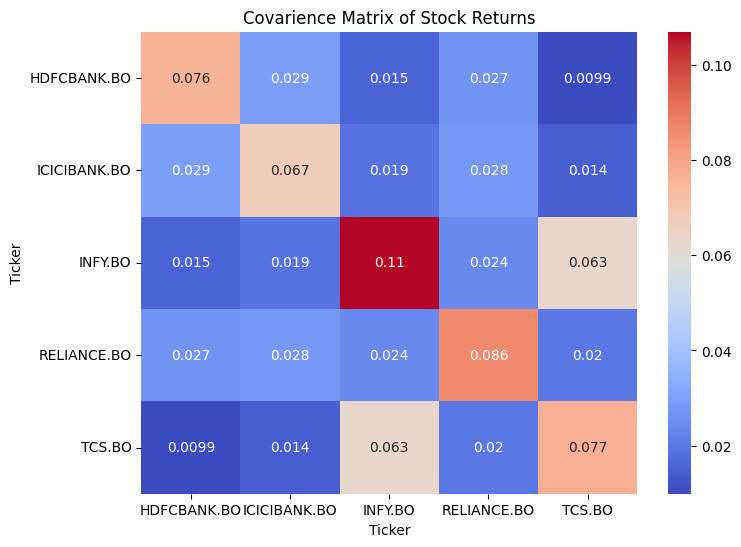

In [204]:
plt.figure(figsize=(8, 6))
sns.heatmap(covarince_matrix, annot=True, cmap="coolwarm")
plt.title("Covarience Matrix of Stock Returns")
plt.show()

## Analzying above
- Highest covariences in HDFC and ICICI expected as same sector
- similarly for tcs and infy aas both are IT stocks

- Lowest TCS and hdfc good for diversification
- highest risk is TCS and INFY due to sector overlap
- moderate reliance and infy

- correlation measures how stocks move together  ie only direction of movement
- covarience measures direction of movement and how much the direction is

covarience is unbounded hence the correlation 1 is not necessary in diagola

### Main portfolio metrics are:

- portfolio return acc to weight assigned 

$$ \sum_{i=1}^nwi*ri $$

- portfolio risk ie volatility 

$$ volatility = \sqrt{\sum_{i=1}^n \sum_{j=1}^n w_i w_j var_ij } $$


- sharpe ration reward/risk = 
$$ (portfolio return - risk free rate )/ portfolio volatiltiy $$


low varince pairs should get more priority than high varience ones

- risk free rate assume 0 here
- we want to maximise out sharpe ratio ie get more return
- We will use mathematical optimization

In [ ]:
from scipy.optimize import minimize

#maximize +ve no can be equivalent to minimize negative no hence negtive sharpe
def negative_sharpe(weights):
    ret = np.dot(weights,mean_ret)  #net portfolio return
    vol = np.sqrt(np.dot(weights.T , np.dot(covarince_matrix,weights)))
    return - ret / vol

#constratins = sum of wieghts = 1 and no short selling???
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(5))
initial_guess = [0.2, 0.2, 0.2, 0.2, 0.2]

optimal = minimize(negative_sharpe , initial_guess,bounds = bounds , constraints = constraints)




 ### No short selling bound:

 - i borrow an asset to sell it and hope ill be able to buy it back at a lower price

 - selling with an intention to buy back

 eg i sell stock at 200 and then buy back at 150 henec 50 profit with 

 - the bounds ive kept are 0,1(called "long only") ie i only buy not sell (-ve nai he)

 - allowing short selling would give me higher returns  but complexity high and risk of large losses


In [215]:
optimal

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.0036086140749994724
       x: [ 2.082e-17  6.124e-01  1.133e-01  1.451e-16  2.743e-01]
     nit: 10
     jac: [ 4.141e-04 -3.266e-05  2.269e-04  2.099e-03 -2.082e-05]
    nfev: 60
    njev: 10

In [218]:
optimal_weights = optimal.x
optimal_weights

array([2.08166817e-17, 6.12424167e-01, 1.13312457e-01, 1.45066251e-16,
       2.74263376e-01])

In [220]:
mean_ret

Ticker
HDFCBANK.BO     0.000302
ICICIBANK.BO    0.000821
INFY.BO         0.000658
RELIANCE.BO    -0.000001
TCS.BO          0.000642
dtype: float64

In [233]:
#from optimal weights my return yould be:

opt_ret = np.dot(optimal_weights,mean_ret)
 
opt_vol =  np.sqrt(np.dot(optimal_weights.T , np.dot(covarince_matrix,optimal_weights)))


opt_sharpe = opt_ret / opt_vol


print("using an optimizer my return is " , opt_ret*100)

print("using an optimizer volatility is " , opt_vol*100)
print("my sharpe ratio is " , opt_sharpe)


using an optimizer my return is  0.07536928588441852
using an optimizer volatility is  20.885936904857175
my sharpe ratio is  0.0036086140749994724


In [238]:
#if i used equal wwights 0.2 0.2 0.2

#from optimal weights my return yould be:
eq_wights = [0.2 , 0.2 , 0.2 , 0.2 , 0.2]
eq_ret = np.dot(eq_wights ,mean_ret)
 
eq_vol =  np.sqrt(np.dot(eq_wights , np.dot(covarince_matrix,eq_wights )))


eq_sharpe = eq_ret / eq_vol


print("using equal wts my return is " , eq_ret*100)

print("using equal wts volatility is " , eq_vol*100)
print("my sharpe ratio is " , eq_sharpe)


using equal wts my return is  0.04844393262187093
using equal wts volatility is  19.09481115383312
my sharpe ratio is  0.0025370207765655866


- i increased my return by 56%
- volatlity increased a little ~9% more risk
- sharpe ratio has increasd by 42% as well


### Backtesting

- a framework is designed for my portfolio
- the the strategy is trained then tested on unseen data

In [243]:
ret_close =returns["Close"]

In [244]:
train_returns = ret_close.loc["2023-01-03":"2023-12-31"]
test_returns = ret_close.loc["2024-01-01":]

In [254]:
test_returns

Ticker,HDFCBANK.BO,ICICIBANK.BO,INFY.BO,RELIANCE.BO,TCS.BO
Date,,,,,
2024-01-01,-0.005264,0.004817,0.005445,0.001934,0.004124
2024-01-02,-0.000823,-0.019126,-0.010508,0.008128,-0.007177
2024-01-03,-0.015536,0.002189,-0.029154,-0.010705,-0.024238
2024-01-04,0.010312,0.002235,0.014763,0.005594,-0.006650
2024-01-05,-0.004497,0.007755,0.013689,0.003600,0.019294
...,...,...,...,...,...
2024-12-24,-0.001860,0.000964,-0.007563,0.001146,0.005738
2024-12-26,-0.003282,0.000424,-0.001624,-0.005640,-0.002882
2024-12-27,0.003404,0.006894,0.005430,0.003576,-0.000156


so we create a func which is a framework of how we trained our portfolio wieghts ebofre

3 main things , return , volatlity and sharpe ratio

In [248]:
def optimize_portfolio(returns):
    mean_ret = returns.mean()

    cov_matrix = returns.cov()

    def negative_sharpe(weights):
        ret = np.dot(weights, mean_ret) 
        vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return -ret / vol
    
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(len(mean_ret)))
    initial_guess = [1./len(mean_ret)] * len(mean_ret)
    
    result = minimize(negative_sharpe, initial_guess, bounds=bounds, constraints=constraints)
    return result.x



In [250]:
opt_weights = optimize_portfolio(train_returns)
opt_weights

array([5.44917647e-04, 4.05018484e-01, 0.00000000e+00, 0.00000000e+00,
       5.94436598e-01])

now i have weights for which it has optimized for the one year ,
i will test on 2024

In [256]:
test_port_ret = test_returns.dot(opt_weights)

test_port_ret   #using optimal weights what returns i shoudl get daily


Date
2024-01-01    0.004399
2024-01-02   -0.012013
2024-01-03   -0.013530
2024-01-04   -0.003042
2024-01-05    0.014607
                ...   
2024-12-24    0.003800
2024-12-26   -0.001543
2024-12-27    0.002701
2024-12-30   -0.005395
2024-12-31   -0.012553
Length: 244, dtype: float64

Cumulative returns:
- total growth of the money over the time period say 1rs

In [258]:
#cumulative returns

cum_ret = (1 + test_port_ret).cumprod()
cum_ret

Date
2024-01-01    1.004399
2024-01-02    0.992333
2024-01-03    0.978907
2024-01-04    0.975929
2024-01-05    0.990185
                ...   
2024-12-24    1.201197
2024-12-26    1.199343
2024-12-27    1.202583
2024-12-30    1.196095
2024-12-31    1.181081
Length: 244, dtype: float64

In [260]:
annualized_return = test_port_ret.mean() * 252
annualized_volatility = test_port_ret.std() * np.sqrt(252)
sharpe_ratio = (annualized_return ) / annualized_volatility


In [261]:
annualized_return


0.1857878756573434

In [262]:
annualized_volatility

0.16701550149066285

In [263]:
sharpe_ratio

1.1123989929026439

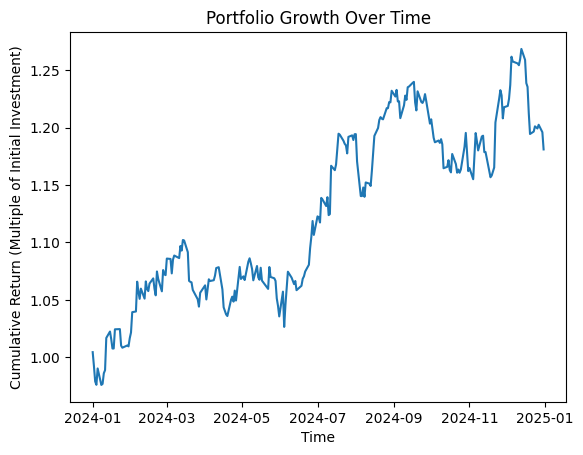

In [264]:
plt.plot(cum_ret)
plt.title("Portfolio Growth Over Time")
plt.ylabel("Cumulative Return (Multiple of Initial Investment)")
plt.xlabel("Time")
plt.show()

In [265]:
#resume point proj is backtesting and checking aagaisnt benchmarks 

#capm analysis
# test on diff time periods